# Errores Comunes

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Parte 1

In [2]:
url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/co2.csv"
df = pd.read_csv(url)

url2 = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/gapminder.csv"
df2 = pd.read_csv(url2)

df2_subset = df2[['fertility', 'life', 'population']]

Subimos los datos de github y para el segundo dataframe solo necesitamos las columnas fertility, life y population

In [4]:
df_melted = df.melt(id_vars=["country"], var_name="year", value_name="co2_emissions")
df_melted["year"] = pd.to_numeric(df_melted["year"])

df_merge = pd.merge(df_melted, df2_subset, left_index=True, right_index=True, how='inner')
df_merge = df_merge.dropna()
df_merge.head()

,country,year,co2_emissions,fertility,life,population
30,Canada,1800,0.00568,7.796,51.738,18553819.0
63,Germany,1800,0.03480,4.094,69.459,2508026.0
136,Poland,1800,0.04280,2.514,68.963,30533827.0
182,United Kingdom,1800,2.16000,6.984,42.526,12452725.0
183,United States,1800,0.03720,6.949,43.088,12792237.0


En esta parte hacemos el melt para poder tener el año como una sola columna y no varias. Después hacemos el merge de los dos dataframes.

In [6]:
# Para co2 vs life
fig_life = px.scatter(df_merge, x='co2_emissions', y='life', 
                      animation_frame="year", animation_group="country",
                      color="life", hover_name="country",
                      labels={'co2_emissions': 'CO2 Emissions (Metric Tons per Capita)', 'life': 'Life Expectancy (Years)'})
fig_life.show()

# Para co2 vs fertility
fig_fertility = px.scatter(df_merge, x='co2_emissions', y='fertility', 
                           animation_frame="year", animation_group="country",
                           color="fertility", hover_name="country",
                           labels={'co2_emissions': 'CO2 Emissions (Metric Tons per Capita)', 'fertility': 'Fertility Rate'})
fig_fertility.show()


Las gráficas anteriores muestran la distribución de los datos atravez de los años. La primera tienen en el eje x la emisión de CO2 y en el eje y la esperanza de vida en años. Podemos observar que a lo largo del tiempo miestras más emision de CO2 hay menor es la esperanza de vida. 

En el segundo gráfico tenemos en el eje x la emisión de CO2 y en el eje y el fertility rate. Podemos observar que a lo largo del tiempo entre más emisión de CO2 la fertilidad va aumente poco, pero con una emisión baja la fertilidad se mantiene.

In [7]:
# Calcular y mostrar la correlación entre co2_emissions y life
correlation_co2_life = df_merge[['co2_emissions', 'life']].corr()
print("Correlación entre CO2 y Esperanza de Vida:")
print(correlation_co2_life)

# Calcular y mostrar la correlación entre co2_emissions y fertility
correlation_co2_fertility = df_merge[['co2_emissions', 'fertility']].corr()
print("\nCorrelación entre CO2 y Fertilidad:")
print(correlation_co2_fertility)


Correlación entre CO2 y Esperanza de Vida:
               co2_emissions      life
co2_emissions       1.000000  0.002344
life                0.002344  1.000000

Correlación entre CO2 y Fertilidad:
               co2_emissions  fertility
co2_emissions       1.000000   0.007139
fertility           0.007139   1.000000


Con la matriz de correlación podemos observar que la correlación ente la esperanza de vida y la emisión de CO2 es muy bajo siendo 0,0023

Y la correlación entre fertilidad y la emisión de CO2 es más alta de con la esperanza de vida pero sigue siendo una correlación muy baja de 0.007

## Parte 2

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

from scipy import stats

In [43]:
url = "https://raw.githubusercontent.com/lihkir/Data/main/diabetes.csv"
df = pd.read_csv(url)
df_original = pd.read_csv(url)

In [8]:
df_head = df.head()
df_info = df.info()

df_head, df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None)

In [42]:
df.loc[df['Glucose'] == 0, 'Glucose'] = np.nan
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = np.nan 
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = np.nan
df.loc[df['Insulin'] == 0, 'Insulin'] = np.nan
df.loc[df['BMI'] == 0, 'BMI'] = np.nan

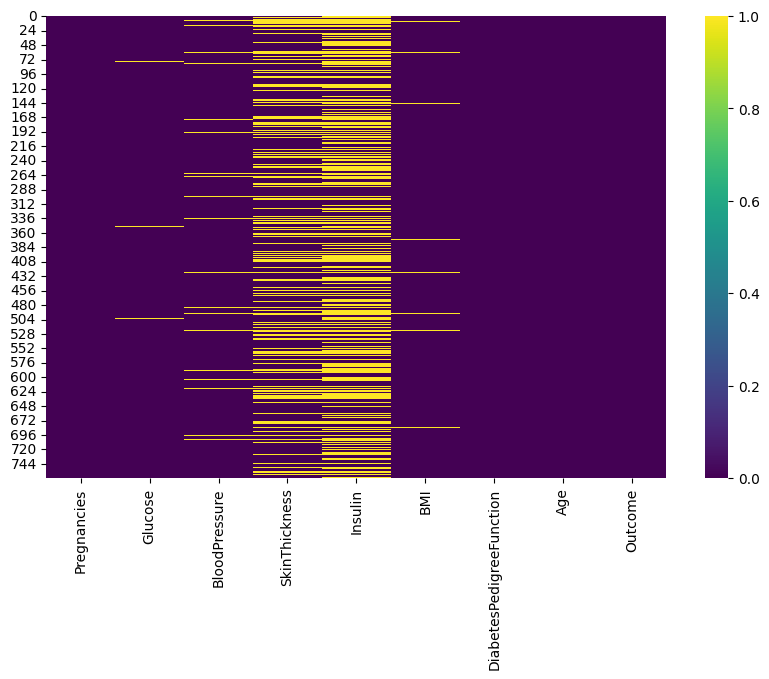

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show() 

La imagen muestra un gráfico de barras que muestra la distribución de valores faltantes (o valores potencialmente no faltantes) en diferentes columnas o características de un conjunto de datos. El eje x enumera los nombres de las funciones, mientras que el eje y representa los índices o recuentos de filas.

Algunas observaciones clave:

La función "Embarazos" tiene valores faltantes o no faltantes para las filas indexadas entre 26 y 754 aproximadamente.

Las características "Glucosa", "Presión arterial", "Espesor de la piel", "Insulina" e "IMC" tienen un patrón similar de valores faltantes o no faltantes, con espacios o valores faltantes repartidos en las filas.

La característica "DiabetesPedigreeFunction" parece tener menos valores faltantes o no faltantes, con una barra más pequeña que representa su distribución.

Las características "Edad" y "Resultado" parecen tener valores faltantes o no faltantes concentrados en un rango más pequeño de filas, como lo indican las barras más cortas.

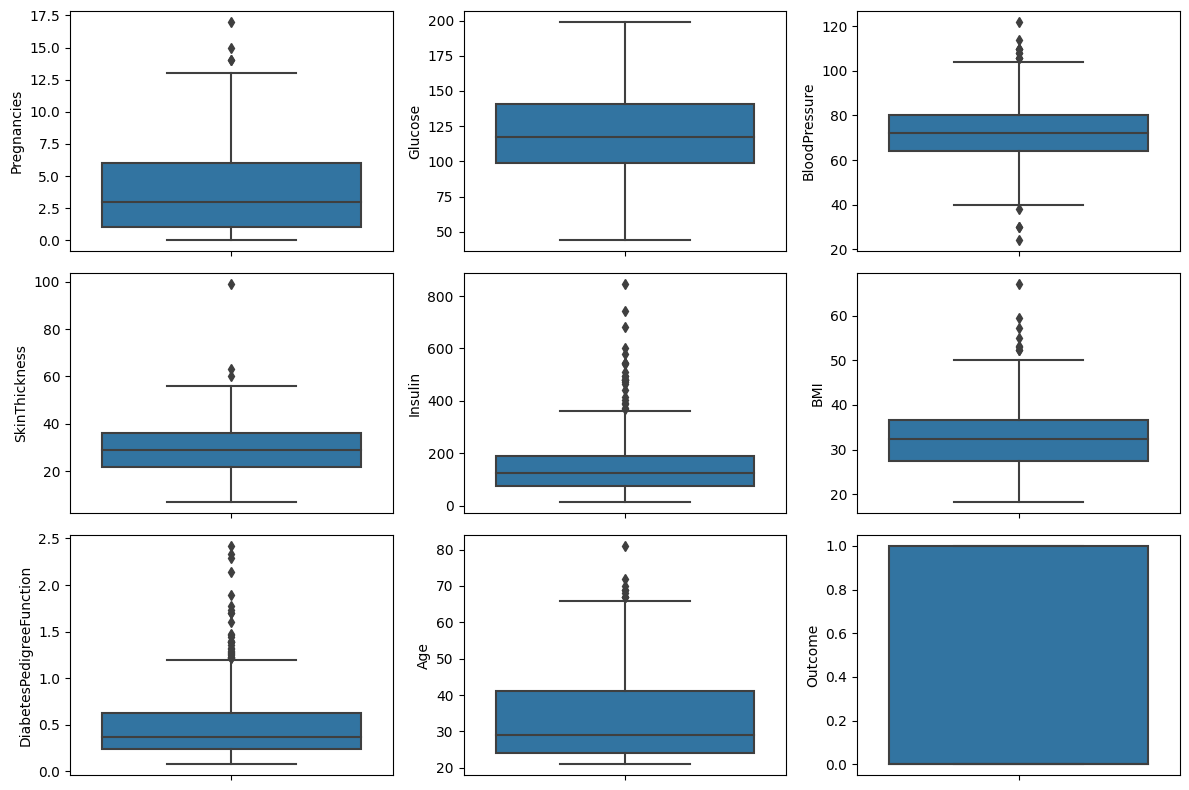

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.tight_layout()
plt.show() 

Este gráfico presenta múltiples medidas e indicadores a través de varios paneles. Cada panel muestra un conjunto diferente de métricas o variables en forma de barras o puntos.

En general, las barras azules representan valores o cantidades, mientras que los puntos negros parecen representar valores máximos, mínimos o rangos.

Algunos de los paneles muestran medidas relacionadas con la gestación, como la edad gestacional y el peso al nacer. Otros paneles presentan recuentos o valores numéricos sin una interpretación obvia directa desde el gráfico.

Se puede ver claramente que la gran cantidad de gráficos tienen valores atípicos entonces nos funcionara para después.

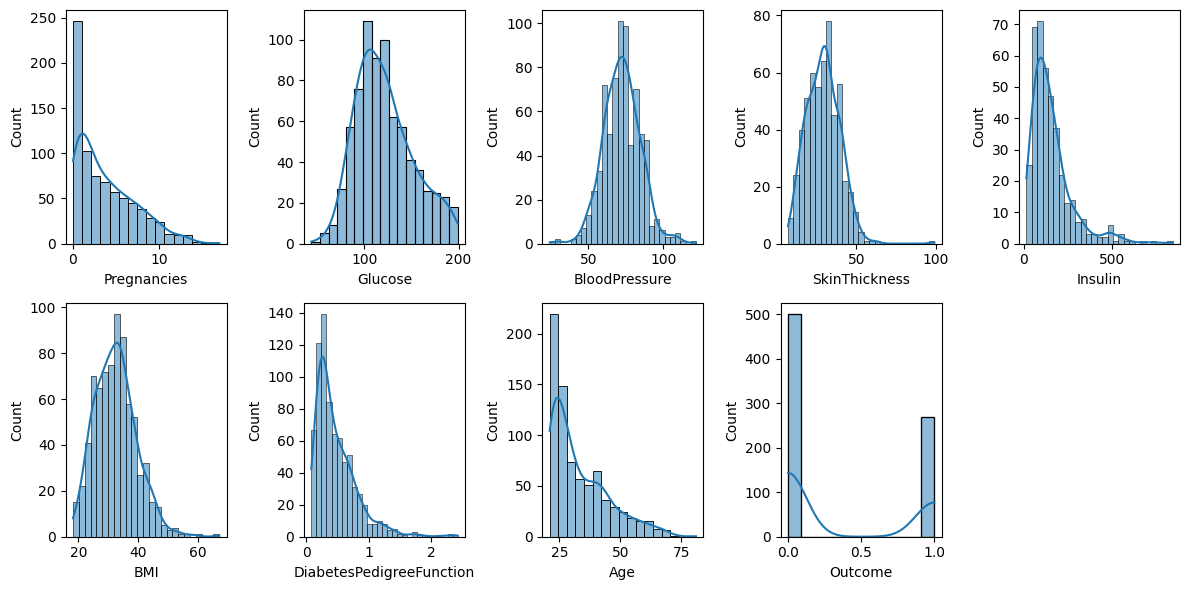

In [15]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, start=1):
    plt.subplot(2, 5, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.tight_layout()
plt.show() 

Este gráfico muestra distribuciones de diferentes características o variables relacionadas con la salud, utilizando histogramas y gráficos de densidad. Cada panel representa una variable diferente, como el número de embarazos, niveles de glucosa, presión arterial, grosor de la piel, índice de masa corporal (BMI), función de pedigrí de diabetes, edad y niveles de insulina. Las distribuciones varían en forma, desde formas aproximadamente normales hasta distribuciones sesgadas o multimodales.

El panel "Outcome" muestra una distribución bimodal, lo que sugiere que podría representar una variable binaria o categórica, posiblemente indicando la presencia o ausencia de una condición o resultado específico.

In [28]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df.loc[df[column] == 0, column] = np.nan

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

El resultado muestra el recuento de valores NaN para cada columna en el DataFrame después de reemplazar 0 con NaN en las columnas especificadas. Por ejemplo:

Embarazos: 0 valores NaN

Glucosa: 5 valores NaN

Presión arterial: 35 valores NaN

Grosor de la piel: 227 valores NaN

Insulina: 374 valores NaN

IMC: 11 valores NaN

DiabetesPedigreeFunción: 0 valores NaN

Edad: 0 valores NaN
Resultado: 0 valores NaN

In [29]:
missing_data_proportion = df.isnull().mean().sort_values(ascending=False)
missing_data_proportion

Insulin                     0.486979
SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

El resultado muestra la proporción de datos faltantes para cada columna del DataFrame, ordenados de mayor a menor:

Insulina: 0,486979 (faltan aproximadamente el 48,7 % de los valores)

Grosor de la piel: 0,295573 (faltan aproximadamente el 29,6 % de los valores)

Presión arterial: 0,045573 (faltan aproximadamente el 4,6 % de los valores)

IMC: 0,014323 (faltan aproximadamente el 1,4% de los valores)

Glucosa: 0,006510 (faltan aproximadamente el 0,7 % de los valores)

Embarazos, diabetesPedigreeFunción, edad, resultado: 0,000000 (no faltan valores)

## TESTS

### Rosner

In [55]:
def rosner_test(data, max_outliers):
    data = np.array(data)
    outliers = []
    for _ in range(max_outliers):
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        z_scores = np.abs((data - mean) / std)
        max_z_score = np.max(z_scores)
        max_z_index = np.argmax(z_scores)
        if max_z_score > 3:
            outliers.append(data[max_z_index])
            data = np.delete(data, max_z_index)
        else:
            break
    return outliers

for column in df.columns:
    print(f"Outliers en la variable '{column}':")
    outliers = rosner_test(df[column], 15)
    print(outliers)
    print("-" * 30)

Outliers en la variable 'Pregnancies':
[17.0, 15.0, 14.0, 14.0]
------------------------------
Outliers en la variable 'Glucose':
[]
------------------------------
Outliers en la variable 'BloodPressure':
[122.0, 24.0, 30.0, 30.0, 114.0, 110.0, 110.0, 110.0, 108.0, 108.0, 38.0, 106.0, 106.0, 106.0]
------------------------------
Outliers en la variable 'SkinThickness':
[99.0, 63.0, 60.0, 56.0]
------------------------------
Outliers en la variable 'Insulin':
[846.0, 744.0, 680.0, 600.0, 579.0, 545.0, 543.0, 540.0, 510.0, 495.0, 495.0, 485.0, 480.0, 480.0, 478.0]
------------------------------
Outliers en la variable 'BMI':
[67.1, 59.4, 57.3, 55.0, 53.2, 52.9, 52.3, 52.3]
------------------------------
Outliers en la variable 'DiabetesPedigreeFunction':
[2.42, 2.329, 2.288, 2.137, 1.893, 1.781, 1.731, 1.699, 1.698, 1.6, 1.476, 1.461, 1.441, 1.4, 1.394]
------------------------------
Outliers en la variable 'Age':
[81.0, 72.0, 70.0, 69.0, 69.0, 68.0, 67.0, 67.0, 67.0]
-------------------

Podemos observar con el test de rosner que la mayoria de las variables tienen valores atípicos, excepto Glucose. Y podemos analizar que las que tienen mayor número de datos atípicos es Insulin y Diabetes Pedigree Function, como ya habiamos visto anteriormente en los boxplots.

In [57]:
from scipy.stats import t

def grubbs_test(data, alpha=0.05):
    data = np.array(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    G = np.max(np.abs(data - mean)) / std
    n = len(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    G_critical = (n - 1) * t_critical / np.sqrt(n * (n - 2 + t_critical**2))
    if G > G_critical:
        outlier = data[np.argmax(np.abs(data - mean))]
        return outlier, True
    else:
        return None, False

for column in df.columns:
    print(f"Prueba de Grubbs para la variable '{column}':")
    outlier, is_outlier = grubbs_test(df[column], 0.05)
    if is_outlier:
        print(f"Valor atípico detectado: {outlier}")
    else:
        print("No se detectaron valores atípicos.")
    print("-" * 30)

Prueba de Grubbs para la variable 'Pregnancies':
No se detectaron valores atípicos.
------------------------------
Prueba de Grubbs para la variable 'Glucose':
No se detectaron valores atípicos.
------------------------------
Prueba de Grubbs para la variable 'BloodPressure':
Valor atípico detectado: 122.0
------------------------------
Prueba de Grubbs para la variable 'SkinThickness':
Valor atípico detectado: 99.0
------------------------------
Prueba de Grubbs para la variable 'Insulin':
Valor atípico detectado: 846.0
------------------------------
Prueba de Grubbs para la variable 'BMI':
Valor atípico detectado: 67.1
------------------------------
Prueba de Grubbs para la variable 'DiabetesPedigreeFunction':
Valor atípico detectado: 2.42
------------------------------
Prueba de Grubbs para la variable 'Age':
Valor atípico detectado: 81.0
------------------------------


Para el test de Grubbs podemos ver que Pregnancies y Glucose no tienen valores atípicos detectados, el resto si podemos decir que con un nivel de significancia del %5 tienen por lo menos un dato atípico.

In [69]:
import numpy as np
import pandas as pd

# Función para aplicar el test de Hampel a una serie de datos
def hampel_filter_forloop(input_series, window_size, n_sigmas=3):
    """
    input_series: pandas Series object. Data to filter.
    window_size: int. The number of items in a window to examine.
    n_sigmas: int or float. The number of standard deviations to use as the threshold for detecting an outlier.
    """
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 

    indices = []

    for i in range((window_size), (n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if np.abs(input_series.iloc[i] - x0) > n_sigmas * S0:
            indices.append(i)
    return indices

# Asumiendo que 'df' es tu dataframe
for column in df.columns:
    print(f"Aplicando el filtro de Hampel a la variable '{column}':")
    dato = df[column]
    outlier_indices = hampel_filter_forloop(dato, window_size=3, n_sigmas=3)
    print("Índices de valores atípicos detectados por el filtro de Hampel:", outlier_indices)
    print("-" * 50)

Aplicando el filtro de Hampel a la variable 'Pregnancies':
Índices de valores atípicos detectados por el filtro de Hampel: [10, 48, 49, 72, 88, 98, 102, 104, 159, 181, 223, 250, 254, 259, 270, 274, 284, 295, 310, 314, 319, 323, 327, 333, 353, 363, 370, 375, 397, 410, 414, 436, 450, 455, 461, 468, 469, 473, 486, 523, 533, 578, 585, 601, 608, 635, 648, 652, 658, 690, 712, 725, 731, 740, 756]
--------------------------------------------------
Aplicando el filtro de Hampel a la variable 'Glucose':
Índices de valores atípicos detectados por el filtro de Hampel: [8, 22, 40, 88, 111, 113, 120, 129, 130, 144, 159, 175, 199, 206, 273, 312, 316, 317, 327, 332, 408, 409, 415, 433, 445, 506, 511, 520, 561, 568, 617, 622, 642, 687, 702, 732, 737]
--------------------------------------------------
Aplicando el filtro de Hampel a la variable 'BloodPressure':
Índices de valores atípicos detectados por el filtro de Hampel: [4, 18, 29, 84, 106, 125, 169, 170, 177, 207, 250, 285, 313, 323, 328, 353, 362,

Para el test de hampel vemos que todos tienen datos atípicos pero debemos tener en cuenta que este test es muy sensible a los sesgos en los datos, entonces puede estar interpretando muchos datos como valores atípicos que no lo deberían ser. Y como observamos en el EDA, todos tienen algun tipo de sesgo.

In [44]:
for column in columns_with_zeros:
    df.loc[df[column] == 0, column] = np.nan

X_nan = df.drop('Outcome', axis=1)

# Preparamos diferentes variantes del IterativeImputer con diferentes estimadores
estimators_variants = {
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=10, random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}

imputed_variants = {}

for name, estimator in estimators_variants.items():
    imputer_variant = IterativeImputer(random_state=42, estimator=estimator)
    imputed_data = imputer_variant.fit_transform(X_nan)
    imputed_variants[name] = pd.DataFrame(imputed_data, columns=X_nan.columns)
    print(f"Imputation with {name} completed.")

imputed_variants['BayesianRidge'].isnull().sum().sum(), imputed_variants['DecisionTreeRegressor'].isnull().sum().sum(),imputed_variants['ExtraTreesRegressor'].isnull().sum().sum(), imputed_variants['KNeighborsRegressor'].isnull().sum().sum()


Imputation with BayesianRidge completed.
Imputation with DecisionTreeRegressor completed.
Imputation with ExtraTreesRegressor completed.
Imputation with KNeighborsRegressor completed.


(0, 0, 0, 0)

Eso significa que la imputación se completó con éxito para cada uno de los estimadores (BayesianRidge, DecisionTreeRegressor, ExtraTreesRegressor, KNeighborsRegressor) y, al final, no quedaron valores NaN en el conjunto de datos para ninguno de los estimadores utilizados, esto lo podemos ver en la salida = (0, 0, 0, 0)

In [45]:
# Creamos un diccionario para almacenar las estadísticas de todas las variables
all_stats = {name: pd.DataFrame(index=['mean', 'median', '25%', '75%', 'IQR']) for name in imputed_variants.keys()}

for name, df in imputed_variants.items():
    for column in df.columns:
        description = df[column].describe()
        all_stats[name].loc[:, column] = [description['mean'], description['50%'], description['25%'], description['75%'], description['75%'] - description['25%']]

In [36]:
print(all_stats['BayesianRidge'])

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean       3.845052  121.641941      72.352451      28.906892  152.650328   
median     3.000000  117.000000      72.000000      28.447099  130.185304   
25%        1.000000   99.000000      64.000000      22.120844   89.983889   
75%        6.000000  140.250000      80.000000      35.000000  190.000000   
IQR        5.000000   41.250000      16.000000      12.879156  100.016111   

              BMI  DiabetesPedigreeFunction        Age  
mean    32.443084                  0.471876  33.240885  
median  32.150000                  0.372500  29.000000  
25%     27.500000                  0.243750  24.000000  
75%     36.600000                  0.626250  41.000000  
IQR      9.100000                  0.382500  17.000000  


In [37]:
print(all_stats['DecisionTreeRegressor'])

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean       3.845052  121.848958      72.558594      28.977865  156.882812   
median     3.000000  117.000000      72.000000      29.000000  125.000000   
25%        1.000000   99.000000      64.000000      21.000000   76.000000   
75%        6.000000  141.000000      80.000000      36.000000  190.000000   
IQR        5.000000   42.000000      16.000000      15.000000  114.000000   

              BMI  DiabetesPedigreeFunction        Age  
mean    32.438932                  0.471876  33.240885  
median  32.300000                  0.372500  29.000000  
25%     27.500000                  0.243750  24.000000  
75%     36.600000                  0.626250  41.000000  
IQR      9.100000                  0.382500  17.000000  


In [38]:
print(all_stats['ExtraTreesRegressor'])

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean       3.845052  121.636328      72.389323       28.98776  155.391146   
median     3.000000  117.000000      72.000000       29.00000  133.250000   
25%        1.000000   99.000000      64.000000       22.00000   88.000000   
75%        6.000000  141.000000      80.000000       35.80000  191.300000   
IQR        5.000000   42.000000      16.000000       13.80000  103.300000   

              BMI  DiabetesPedigreeFunction        Age  
mean    32.447565                  0.471876  33.240885  
median  32.300000                  0.372500  29.000000  
25%     27.500000                  0.243750  24.000000  
75%     36.600000                  0.626250  41.000000  
IQR      9.100000                  0.382500  17.000000  


In [39]:
print(all_stats['KNeighborsRegressor'])

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean       3.845052  121.595052      72.404427      29.019531  152.529948   
median     3.000000  117.000000      72.000000      28.900000  133.600000   
25%        1.000000   99.000000      64.000000      23.000000   88.000000   
75%        6.000000  140.250000      80.000000      35.000000  188.400000   
IQR        5.000000   41.250000      16.000000      12.000000  100.400000   

              BMI  DiabetesPedigreeFunction        Age  
mean    32.408073                  0.471876  33.240885  
median  32.050000                  0.372500  29.000000  
25%     27.400000                  0.243750  24.000000  
75%     36.600000                  0.626250  41.000000  
IQR      9.200000                  0.382500  17.000000  


BayesianRidge: Este estimador tiende a producir resultados más suaves y regulares, lo que generalmente es una buena opción si se espera que los datos tengan relaciones lineales. En los resultados, parece que los valores de la mediana son consistentes y cercanos a la media, lo que sugiere una distribución simétrica y pocas variaciones extremas en la imputación.

DecisionTreeRegressor: Es conocido por capturar relaciones no lineales y puede manejar variables categóricas naturalmente. Sin embargo, puede ser más sensible a los valores atípicos. Los resultados muestran un IQR ligeramente más amplio para algunas variables, lo que indica una mayor variabilidad en los valores imputados.

ExtraTreesRegressor: Al ser un ensamble de árboles, generalmente proporciona predicciones más estables y menos propensas a sobreajustes. Los resultados aquí son similares a los de DecisionTreeRegressor, pero con ligeras diferencias que pueden indicar una imputación más robusta frente a variaciones y valores atípicos.

KNeighborsRegressor: Este estimador toma un enfoque localizado, imputando valores basados en la similitud con los "vecinos" más cercanos. Esto puede ser particularmente útil para datos con agrupaciones naturales. Los valores imputados muestran coherencia con los otros estimadores, lo que sugiere que las características tienen una estructura bien definida que es capturada por la proximidad de los vecinos.

Al comparar las estadísticas descriptivas de las diferentes imputaciones, puedes observar que no hay cambios dramáticos en los valores medios, lo que es un buen signo de que la imputación no está sesgando significativamente los datos. Sin embargo, hay ligeras variaciones en el IQR, lo que refleja diferencias en la dispersión de los valores imputados entre los estimadores.

In [46]:
performance_metrics = {}

for name, df in imputed_variants.items():
    X = df.values
    y = df_original['Outcome'].values  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    performance_metrics[name] = {'Accuracy': accuracy, 'AUC': auc, 'F1 Score': f1}

for name, metrics in performance_metrics.items():
    print(f"Metrics for {name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("\n")


Metrics for BayesianRidge:
Accuracy: 0.7359307359307359
AUC: 0.7010347682119205
F1 Score: 0.6064516129032258


Metrics for DecisionTreeRegressor:
Accuracy: 0.7532467532467533
AUC: 0.7230960264900662
F1 Score: 0.6369426751592356


Metrics for ExtraTreesRegressor:
Accuracy: 0.7359307359307359
AUC: 0.7010347682119205
F1 Score: 0.6064516129032258


Metrics for KNeighborsRegressor:
Accuracy: 0.7359307359307359
AUC: 0.7010347682119205
F1 Score: 0.6064516129032258




BayesianRidge: El rendimiento con la imputación utilizando BayesianRidge es comparable al de ExtraTreesRegressor y KNeighborsRegressor en términos de precisión, AUC y puntaje F1. Esto indica que el modelo con este estimador de imputación tiene un equilibrio razonable entre la sensibilidad y especificidad y una precisión aceptable.

DecisionTreeRegressor: Ha mostrado un rendimiento ligeramente superior en todas las métricas en comparación con BayesianRidge, ExtraTreesRegressor, y KNeighborsRegressor. La precisión y el AUC son mayores, y el puntaje F1, que combina la precisión y la sensibilidad, también es el más alto de los cuatro, indicando un mejor equilibrio entre la precisión y la recuperación.

ExtraTreesRegressor: Los resultados son idénticos a los obtenidos con BayesianRidge y KNeighborsRegressor. Esto puede sugerir que, para este conjunto de datos y el modelo utilizado, la elección del estimador de imputación no ha tenido un impacto significativo en el rendimiento del modelo.

KNeighborsRegressor: Al igual que BayesianRidge y ExtraTreesRegressor, KNeighborsRegressor tiene las mismas métricas de rendimiento, lo que indica que la imputación mediante este método no ha proporcionado ninguna mejora ni deterioro en el rendimiento del modelo en comparación con los otros estimadores.

En general, el modelo con datos imputados usando DecisionTreeRegressor ha logrado el mejor rendimiento. Sin embargo, la diferencia no es muy grande.